In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
file_path=Path('../Starter_Code/myopia.csv')

In [4]:
#Reads the csv into pandas
df=pd.read_csv(file_path)
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [8]:
#Removes the MYOPIC column from the dataset
myopia_features=df.drop(columns=['MYOPIC'], axis=1)
myopia_features

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [22]:
target= df['MYOPIC']

In [13]:
#Standardizes the dataset using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(myopia_features)
scaled_features = scaler.transform(myopia_features)


In [17]:
#PCA model is created and used to reduce dimensions of the scaled dataset, and the PCA model’s explained variance is set to 90%
from sklearn.decomposition import PCA
pca= PCA(n_components=.90)

pca_features = pca.fit_transform(scaled_features)
#Variance ratios 
print(f'Variance Ratios {pca.explained_variance_ratio_}')


Variance Ratios [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


In [19]:
#t-SNE model is created and used to reduce dimensions of the scaled dataset
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=50)
tsne_features = tsne.fit_transform(pca_features)


C:\Users\zache\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [20]:
tsne_features.shape

(618, 2)

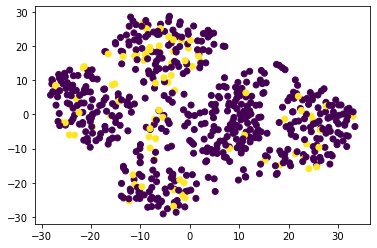

In [28]:
# t-SNE is used to create a plot of the reduced features


myopia_features['x']  = tsne_features[:,0]
myopia_features['y'] = tsne_features[:,1]
myopia_features['class'] = target

plt.scatter(x = myopia_features['x'], y = myopia_features['y'], c=myopia_features['class'])
plt.show()







In [31]:
pca_df= pd.DataFrame(tsne_features, columns=["pc_1", "pc_2"])
pca_df


,pc_1,pc_2
0,-3.051847,7.012769
1,-2.240510,22.780853
2,5.753547,-4.477981
3,-15.142121,8.960205
4,25.681807,-14.807850
...,...,...
613,22.570047,1.173544
614,-1.619247,22.663696
615,-0.290900,23.515078
616,7.688559,5.335994


C:\Users\zache\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


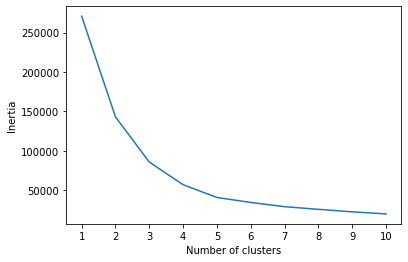

In [36]:
#A K-means model is created, and A for- loop is used to create a list of inertias for each k from 1 to 10
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]



for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

#A plot is created to examine any elbows that exist
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Looking at the Graph above the best k value is 4 or 5


In [47]:
# Initialize the K-Means model
km_model2 = KMeans(n_clusters=5, random_state=0)

# Train the model
km_model2.fit(pca_df)

 # Predict clusters
predicted_clusters = km_model2.predict(pca_df)


pca_df['class'] = km_model2.labels_
# Create return DataFrame with predicted clusters

pca_df

,pc_1,pc_2,class
0,-3.051847,7.012769,2
1,-2.240510,22.780853,2
2,5.753547,-4.477981,0
3,-15.142121,8.960205,1
4,25.681807,-14.807850,3
...,...,...,...
613,22.570047,1.173544,3
614,-1.619247,22.663696,2
615,-0.290900,23.515078,2
616,7.688559,5.335994,0


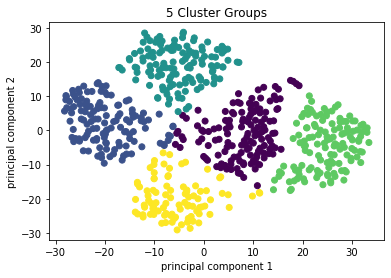

In [50]:
plt.scatter(x=pca_df['pc_1'], y=pca_df['pc_2'], c=pca_df['class'])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("5 Cluster Groups")
plt.show()

As we can see from the plots above that the patients can infact be clustered. With 5 being the best number of clusters.